In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 90% de los datos para entrenamiento y un 10% de los datos para validación
valid_idx  =  range ( len ( df ) - 29 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CAPE_POS_MALESTAR', 'CSI_PENSDESID', 'CSI_RESPROBL', 'SCL90_IDEA_PARAN', 'CSI_EVITPROBL', 'CSI_REESTCOGN', 'SCL90_ANSIE', 'CAPE_POSIT_FREC', 'CAPE_DEPRE_FREC', 'SCL90_SOMAT', 'SCL90_ANS_FOB', 'ESTRES_PERCIBIDO', 'SCL90_PSICOT', 'CSI_RETISOC', 'CSI_AUTOCRIT', 'CSL90_SENS_INT', 'ANSIEDADRASGO', 'TRAUMA_AFECTACION', 'CSI_EXPEMOC', 'CSI_APOYOSOC', 'TRAUMA_FRECUENCIA', 'SCL90_DEPRE', 'CAPE_NEG_FREC', 'CAPE_NEG_MALESTAR', 'CAPE_DEPRE_MALESTAR', 'CSL90_HOSTIL', 'SCL90_OBS_COMP']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.554858 -1.235679  0.908042 -0.912032 ... -0.778055 -0.670345 -0.630859 -0.879321]
 [ 1.937366  0.779569  0.508099  2.414069 ...  1.854194  2.068585  2.186922  1.669387]
 [ 0.203645 -0.395992  0.108156  0.261886 ...  1.400358  0.151334 -0.630859  0.182641]
 [-0.554858 -1.235679 -0.891702 -0.325073 ...  0.583453 -0.670345  0.019398 -0.135948]
 [-0.229786 -2.075366 -2.091531 -0.520726 ... -0.233452 -1.081185 -0.630859 -1.197909]]
[0 2 1 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.103890,0.929938,0.724138,04:45
1,0.928508,0.851280,0.724138,04:45


CAPE_POS_MALESTAR,CSI_PENSDESID,CSI_RESPROBL,SCL90_IDEA_PARAN,CSI_EVITPROBL,CSI_REESTCOGN,SCL90_ANSIE,CAPE_POSIT_FREC,CAPE_DEPRE_FREC,SCL90_SOMAT,SCL90_ANS_FOB,ESTRES_PERCIBIDO,SCL90_PSICOT,CSI_RETISOC,CSI_AUTOCRIT,CSL90_SENS_INT,ANSIEDADRASGO,TRAUMA_AFECTACION,CSI_EXPEMOC,CSI_APOYOSOC,TRAUMA_FRECUENCIA,SCL90_DEPRE,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_MALESTAR,CSL90_HOSTIL,SCL90_OBS_COMP,target,prediction
1.0705,-0.7319,-1.2916,-0.1294,-0.7728,-0.5802,0.2722,0.3136,0.5821,-0.0945,0.5898,-0.1090,1.1624,0.2267,-0.3827,0.4778,0.0405,0.9432,-0.7875,-1.4423,1.0527,0.1676,0.6933,0.8558,1.1100,0.2362,0.1826,2,1
-0.0131,-0.3960,-2.0915,-0.3251,-1.4318,-1.1338,-0.4465,-0.4674,0.3498,-0.5763,-0.6964,1.9171,-0.5814,-1.0491,-1.0878,-0.2051,-0.2659,-0.1727,-0.5962,0.4289,-0.4598,-0.6314,0.6933,2.0357,1.1100,-0.1974,0.2888,0,2
-0.2298,-1.9074,1.3080,-0.7164,-0.7728,0.7116,-0.5662,-0.4674,-0.3471,-0.6727,-0.6964,-0.5857,-0.8497,-0.1986,-0.9116,-0.7514,0.1938,-0.3444,-0.7875,0.5990,-0.6488,-0.9510,0.2923,0.5835,-0.3965,-0.8476,-0.7731,0,0
-0.7716,-0.8998,-0.8917,-0.1294,-0.5531,-0.7647,0.7513,-0.6236,-0.3471,1.0619,-0.1451,-0.1090,-0.4473,-0.4112,-1.2641,0.8875,-0.7256,0.0419,-0.4049,-0.7619,1.0527,1.1263,-0.1087,-1.0504,-0.6703,1.3199,0.1826,2,0
-0.1214,-0.7319,-1.6916,-0.9120,0.3257,-0.2111,-0.2069,-0.3112,0.3498,-0.4800,-0.1451,-0.1090,0.0893,-0.8365,-1.0878,-0.2051,-0.8788,-1.0740,-0.9788,-0.2515,-1.1215,-0.5515,-0.1087,0.4019,0.6991,-0.4141,0.1826,1,0


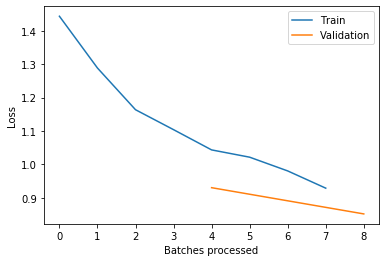

In [10]:
learn.recorder.plot_losses()
learn.show_results()